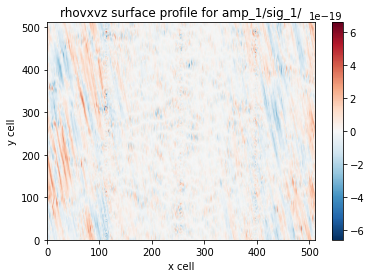

[[ 1.13428175e-19  3.58023415e-20  2.44852214e-20 ... -5.19450038e-20
   1.03248174e-19  9.12278951e-20]
 [ 1.15987214e-19  2.66636646e-20  1.68793830e-20 ... -3.92911534e-20
   9.21732268e-20  7.00302157e-20]
 [ 1.16122212e-19  1.91765928e-20  7.79197594e-21 ... -2.86551908e-20
   8.27883328e-20  4.82513451e-20]
 ...
 [ 1.03592694e-19  7.40310363e-20  3.54698342e-20 ... -1.01927696e-19
   1.28343289e-19  1.30805457e-19]
 [ 1.06126407e-19  6.02869587e-20  3.40317808e-20 ... -8.40511404e-20
   1.22542181e-19  1.23053740e-19]
 [ 1.09665383e-19  4.71950160e-20  3.04139868e-20 ... -6.68459193e-20
   1.13895765e-19  1.09928736e-19]]


In [31]:
import sys
sys.path.append('~/athena-public-version/vis/python/')
#sys.path.append('~/.local/lib/python3.8/site-packages/')
sys.path.append('~/working')


import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
#IMPORT APPROPRIATE ATHINPUT FILE
#import athinput.hgb as athin
import athena_read

def surface_profile(file_name,data_name):
    #print('current file is :'+file_name)
    title=file_name[10:-20]
    title = data_name + ' surface profile for ' +title
    data = athena_read.athdf(file_name)
    #print(data)
    #for 8x8x1 scale height box, with cubic cells, needs to be adjusted for other sizes
    side_length = 1/len(data['x3v'])
    #print(side_length,' side length')
    volume = side_length**3
    #print(volume,' volume')
    
    #constants
    omega0 = 1.0
    qshear = 1.5
    Nx = len(data['x1v'])
    Ny = len(data['x2v'])
    Nz = len(data['x3v'])
    
    #assuming 64x256x256, but should work for any 
    overall_length = Nx*Ny*Nz
    data_arr = []
    #array of vshear possible values
    vsh = -qshear*omega0*data['x1v']
    vsh_3d = np.broadcast_to(vsh,(Nz,Ny,Nx))
    if data_name == '-BxBy':
        data_arr = -1*data['Bcc1']*data['Bcc2']
    elif data_name == 'rhovxvz':
        data_arr = data['vel1']*data['rho']*data['vel3']
 
    else:
        data_arr = data[data_name]
    if data_name == 'vel2':
        data_arr = data_arr-vsh_3d
    data_arr = np.sum(data_arr,axis=(0))
    radial_dim = data['x1f'][-1]-data['x1f'][0]
    div_vol = radial_dim*side_length
    #divide by number of cells in vertical slice
    data_arr = data_arr/(Nz)
    #print(np.shape(data_arr))

    #plotting section
    plt.pcolormesh(data_arr,norm=mpl.colors.CenteredNorm(vcenter =0),shading = 'gouraud',cmap = 'RdBu_r')
    plt.colorbar()
    plt.xlabel('x cell')
    plt.ylabel('y cell')
    plt.title(title)
    plt.show()
    return(data_arr)

print(surface_profile('./ad_prof/amp_1/sig_1/HGB.out2.00001.athdf','rhovxvz'))


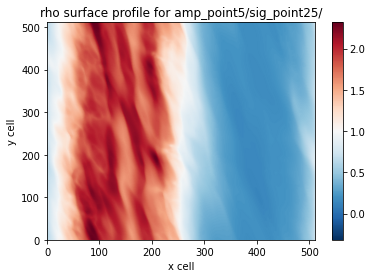

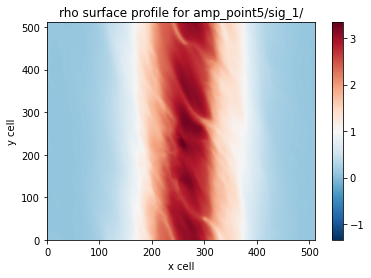

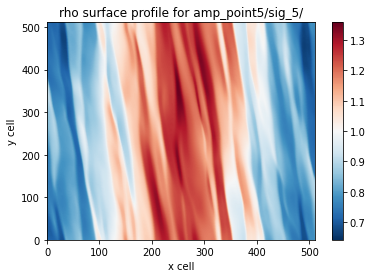

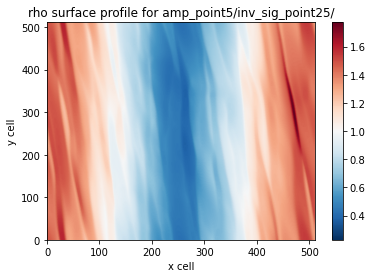

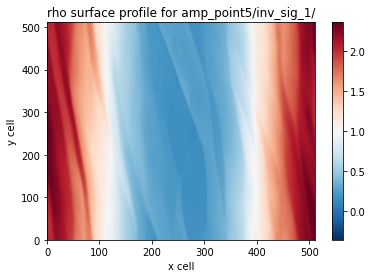

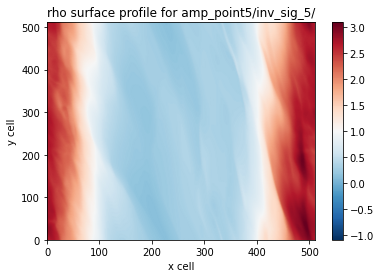

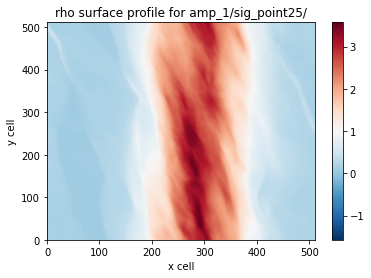

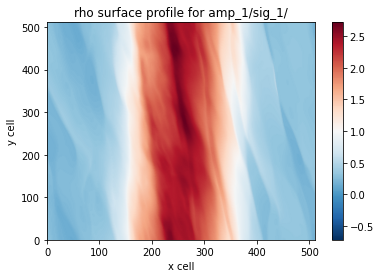

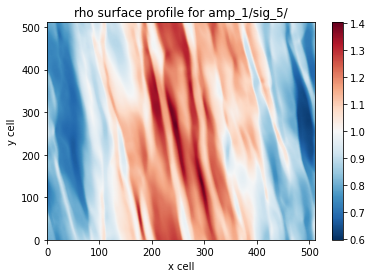

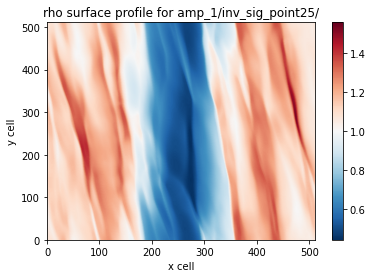

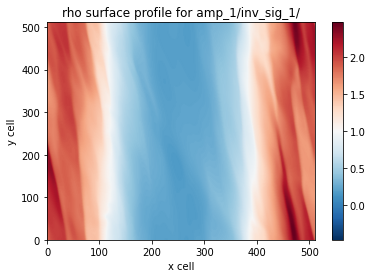

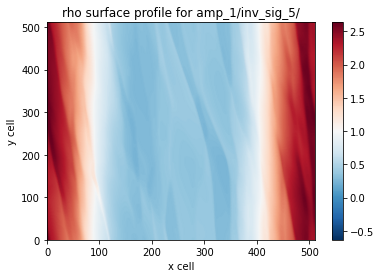

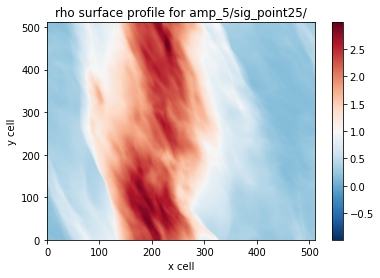

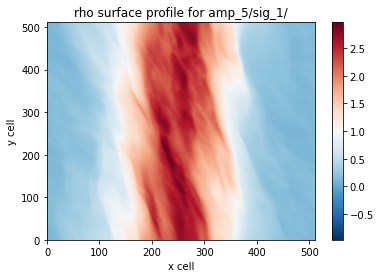

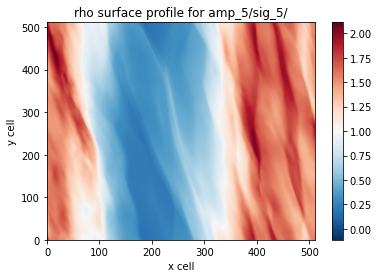

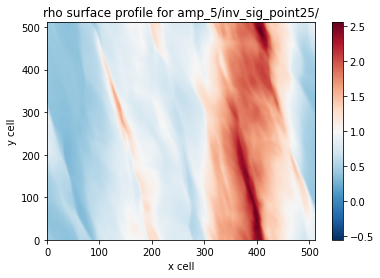

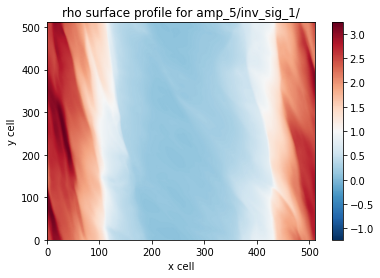

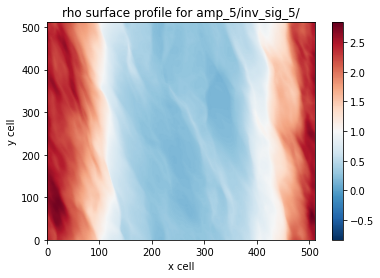

Run time is  37.22325396537781  seconds


In [11]:
import time
file_name_list = [
    "./ad_prof/amp_point5/sig_point25/HGB.out2.00100.athdf",
    "./ad_prof/amp_point5/sig_1/HGB.out2.00100.athdf",
    "./ad_prof/amp_point5/sig_5/HGB.out2.00100.athdf",
    "./ad_prof/amp_point5/inv_sig_point25/HGB.out2.00100.athdf",
    "./ad_prof/amp_point5/inv_sig_1/HGB.out2.00100.athdf",
    "./ad_prof/amp_point5/inv_sig_5/HGB.out2.00100.athdf",
    "./ad_prof/amp_1/sig_point25/HGB.out2.00100.athdf",
    "./ad_prof/amp_1/sig_1/HGB.out2.00100.athdf",
    "./ad_prof/amp_1/sig_5/HGB.out2.00100.athdf",
    "./ad_prof/amp_1/inv_sig_point25/HGB.out2.00100.athdf",
    "./ad_prof/amp_1/inv_sig_1/HGB.out2.00100.athdf",
    "./ad_prof/amp_1/inv_sig_5/HGB.out2.00100.athdf",
    "./ad_prof/amp_5/sig_point25/HGB.out2.00100.athdf",
    "./ad_prof/amp_5/sig_1/HGB.out2.00100.athdf",
    "./ad_prof/amp_5/sig_5/HGB.out2.00100.athdf",
    "./ad_prof/amp_5/inv_sig_point25/HGB.out2.00100.athdf",
    "./ad_prof/amp_5/inv_sig_1/HGB.out2.00100.athdf",
    "./ad_prof/amp_5/inv_sig_5/HGB.out2.00100.athdf"
]

start= time.time()
for file_name in file_name_list:
    x = surface_profile(file_name,'rho')
print('Run time is ',(time.time()-start),' seconds' )

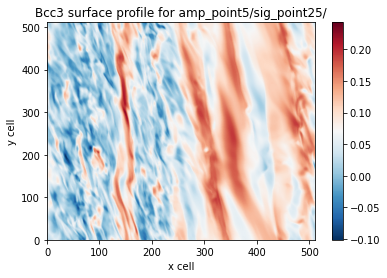

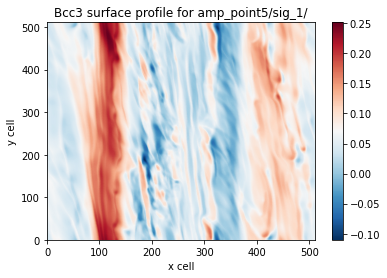

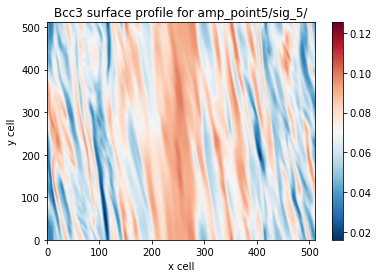

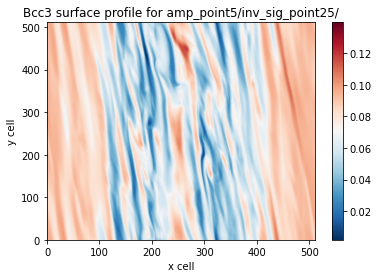

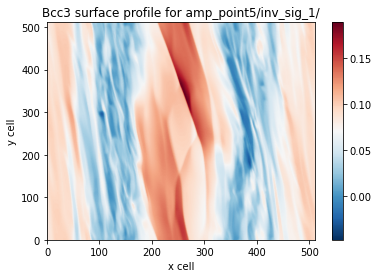

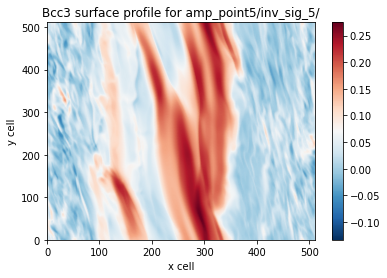

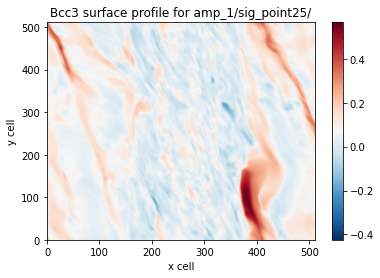

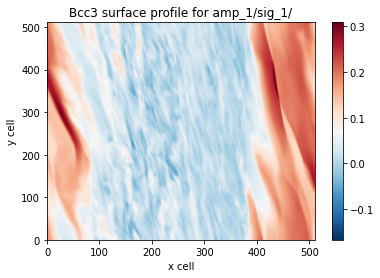

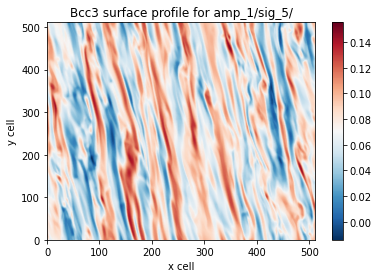

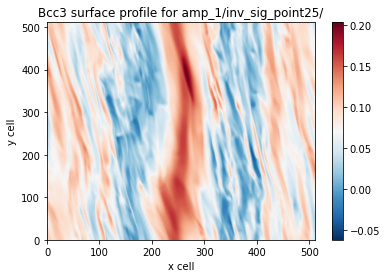

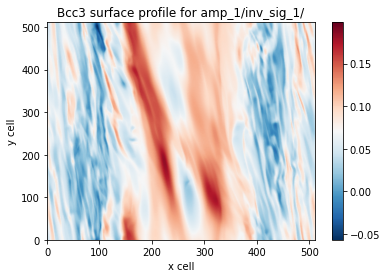

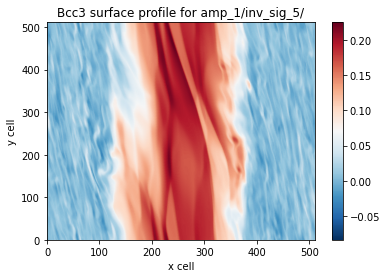

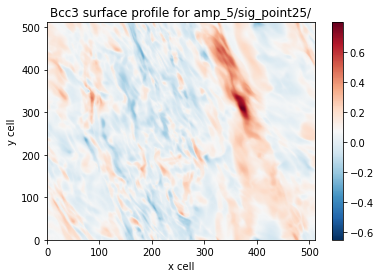

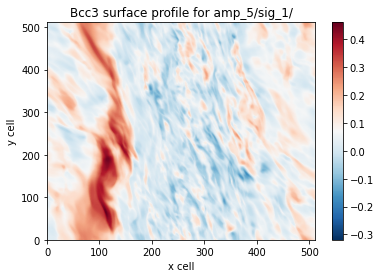

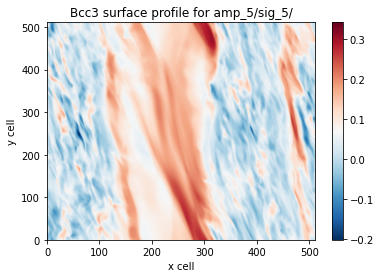

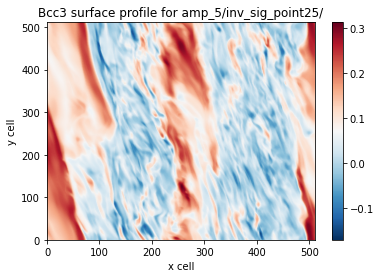

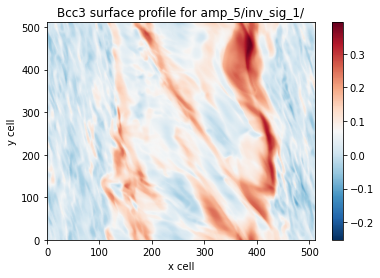

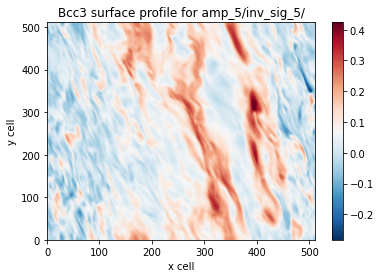

Run time is  36.89361095428467  seconds


In [24]:
import time
file_name_list = [
    "./ad_prof/amp_point5/sig_point25/HGB.out2.00100.athdf",
    "./ad_prof/amp_point5/sig_1/HGB.out2.00100.athdf",
    "./ad_prof/amp_point5/sig_5/HGB.out2.00100.athdf",
    "./ad_prof/amp_point5/inv_sig_point25/HGB.out2.00100.athdf",
    "./ad_prof/amp_point5/inv_sig_1/HGB.out2.00100.athdf",
    "./ad_prof/amp_point5/inv_sig_5/HGB.out2.00100.athdf",
    "./ad_prof/amp_1/sig_point25/HGB.out2.00100.athdf",
    "./ad_prof/amp_1/sig_1/HGB.out2.00100.athdf",
    "./ad_prof/amp_1/sig_5/HGB.out2.00100.athdf",
    "./ad_prof/amp_1/inv_sig_point25/HGB.out2.00100.athdf",
    "./ad_prof/amp_1/inv_sig_1/HGB.out2.00100.athdf",
    "./ad_prof/amp_1/inv_sig_5/HGB.out2.00100.athdf",
    "./ad_prof/amp_5/sig_point25/HGB.out2.00100.athdf",
    "./ad_prof/amp_5/sig_1/HGB.out2.00100.athdf",
    "./ad_prof/amp_5/sig_5/HGB.out2.00100.athdf",
    "./ad_prof/amp_5/inv_sig_point25/HGB.out2.00100.athdf",
    "./ad_prof/amp_5/inv_sig_1/HGB.out2.00100.athdf",
    "./ad_prof/amp_5/inv_sig_5/HGB.out2.00100.athdf"
]

start= time.time()
for file_name in file_name_list:
    x = surface_profile(file_name,'Bcc3')
print('Run time is ',(time.time()-start),' seconds' )

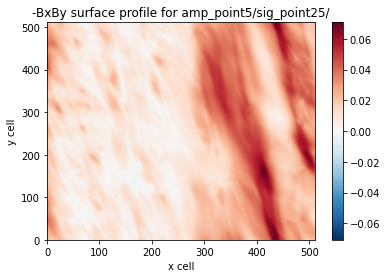

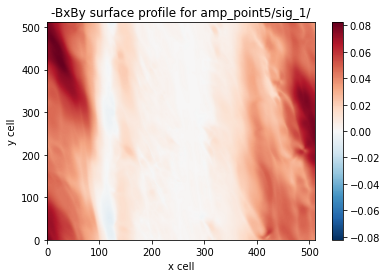

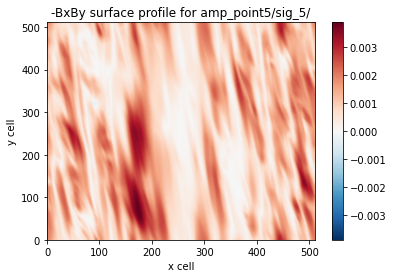

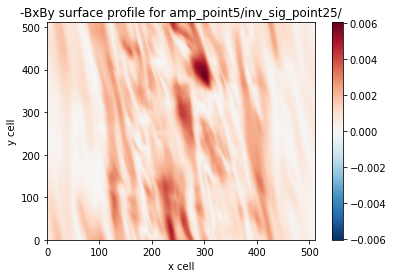

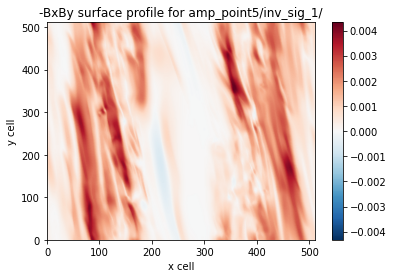

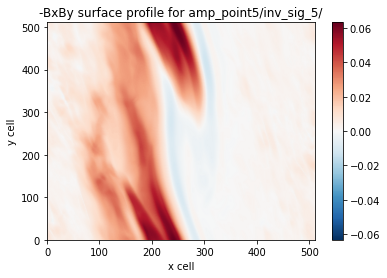

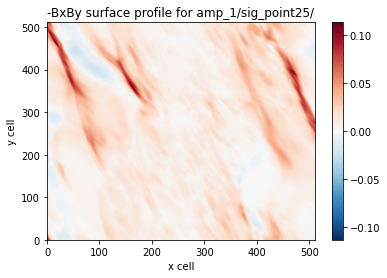

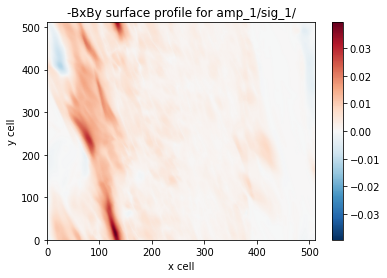

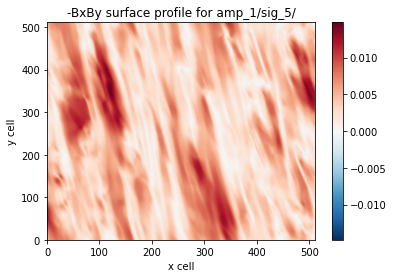

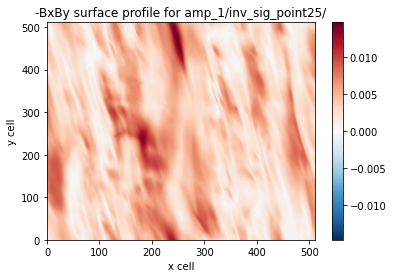

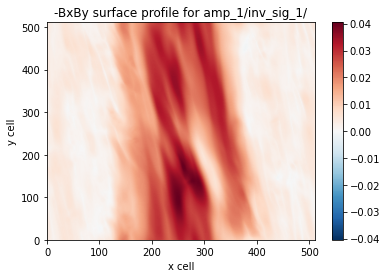

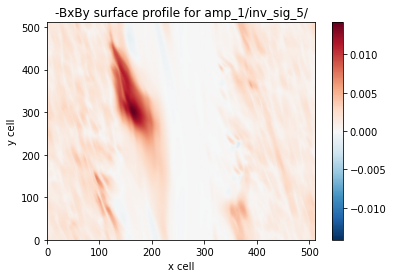

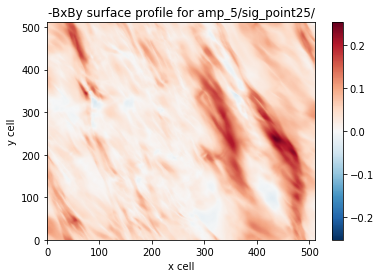

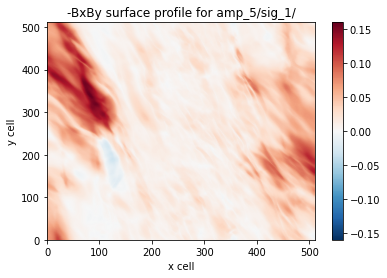

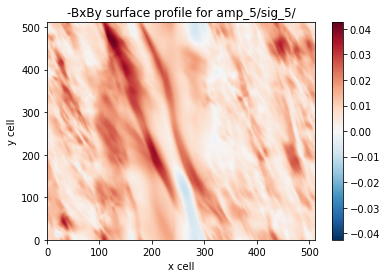

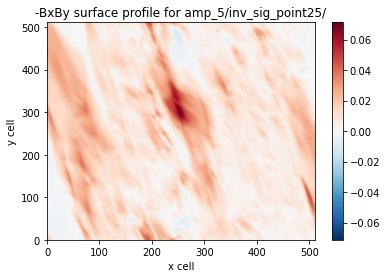

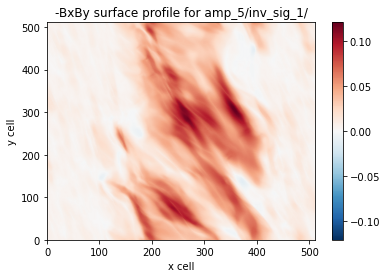

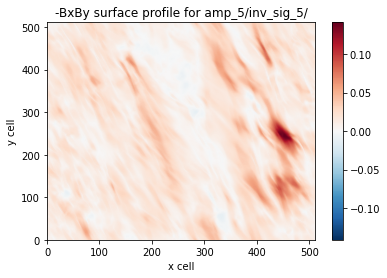

Run time is  79.0002088546753  seconds


In [27]:
import time
file_name_list = [
    "./ad_prof/amp_point5/sig_point25/HGB.out2.00100.athdf",
    "./ad_prof/amp_point5/sig_1/HGB.out2.00100.athdf",
    "./ad_prof/amp_point5/sig_5/HGB.out2.00100.athdf",
    "./ad_prof/amp_point5/inv_sig_point25/HGB.out2.00100.athdf",
    "./ad_prof/amp_point5/inv_sig_1/HGB.out2.00100.athdf",
    "./ad_prof/amp_point5/inv_sig_5/HGB.out2.00100.athdf",
    "./ad_prof/amp_1/sig_point25/HGB.out2.00100.athdf",
    "./ad_prof/amp_1/sig_1/HGB.out2.00100.athdf",
    "./ad_prof/amp_1/sig_5/HGB.out2.00100.athdf",
    "./ad_prof/amp_1/inv_sig_point25/HGB.out2.00100.athdf",
    "./ad_prof/amp_1/inv_sig_1/HGB.out2.00100.athdf",
    "./ad_prof/amp_1/inv_sig_5/HGB.out2.00100.athdf",
    "./ad_prof/amp_5/sig_point25/HGB.out2.00100.athdf",
    "./ad_prof/amp_5/sig_1/HGB.out2.00100.athdf",
    "./ad_prof/amp_5/sig_5/HGB.out2.00100.athdf",
    "./ad_prof/amp_5/inv_sig_point25/HGB.out2.00100.athdf",
    "./ad_prof/amp_5/inv_sig_1/HGB.out2.00100.athdf",
    "./ad_prof/amp_5/inv_sig_5/HGB.out2.00100.athdf"
]

start= time.time()
for file_name in file_name_list:
    x = surface_profile(file_name,'-BxBy')
print('Run time is ',(time.time()-start),' seconds' )

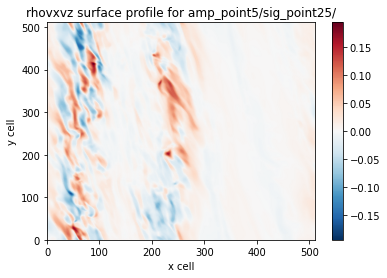

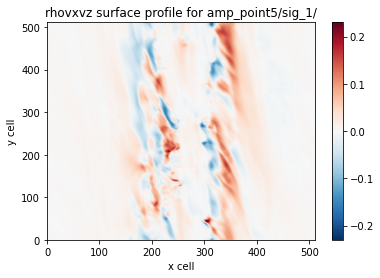

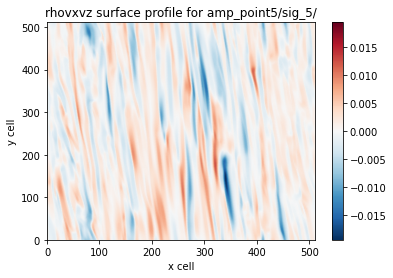

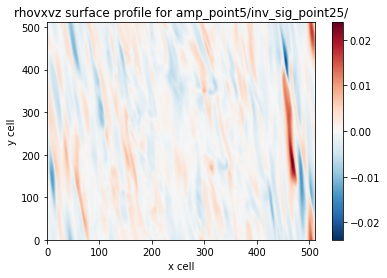

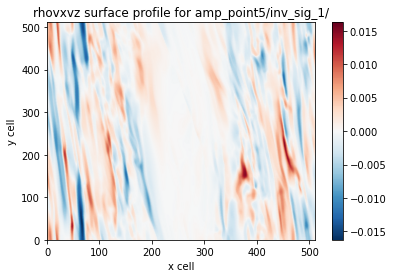

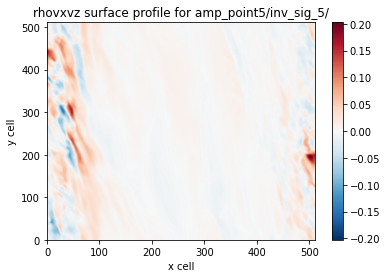

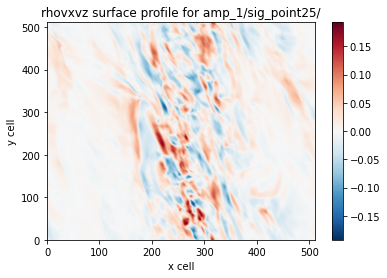

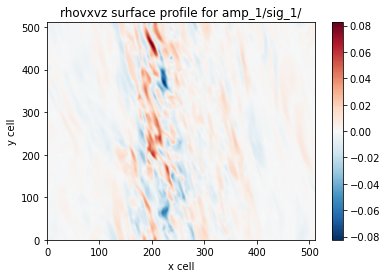

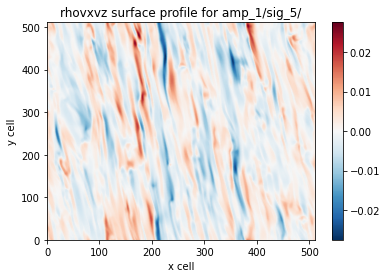

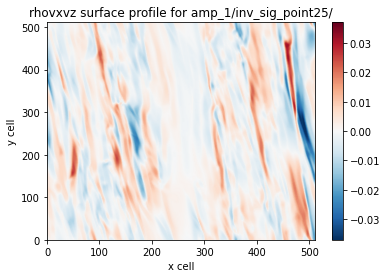

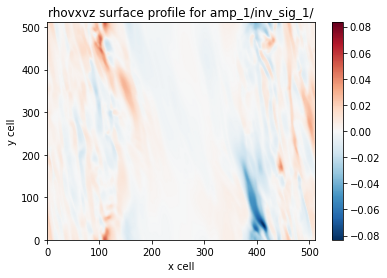

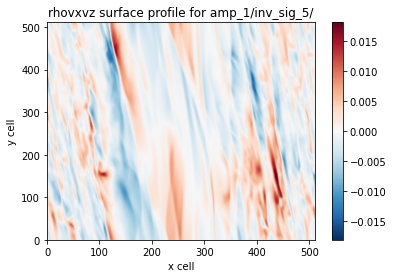

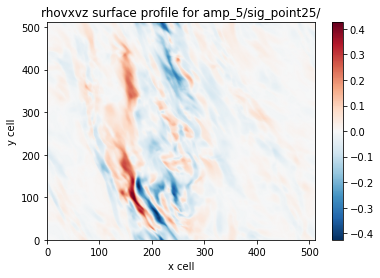

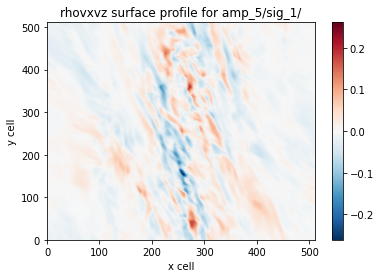

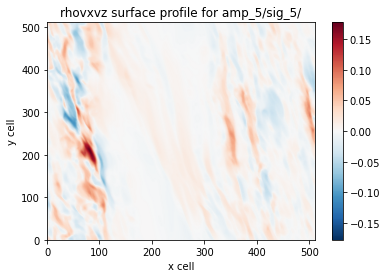

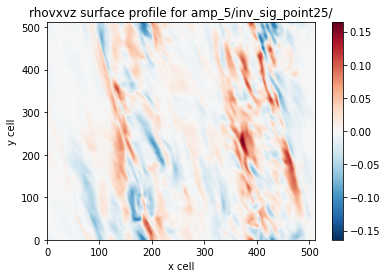

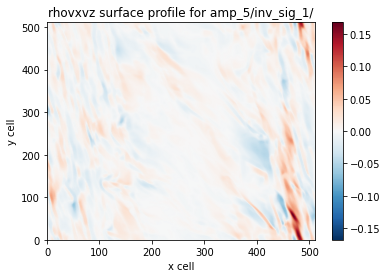

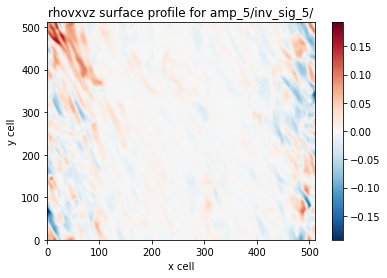

Run time is  37.71088528633118  seconds


In [32]:
import time
file_name_list = [
    "./ad_prof/amp_point5/sig_point25/HGB.out2.00100.athdf",
    "./ad_prof/amp_point5/sig_1/HGB.out2.00100.athdf",
    "./ad_prof/amp_point5/sig_5/HGB.out2.00100.athdf",
    "./ad_prof/amp_point5/inv_sig_point25/HGB.out2.00100.athdf",
    "./ad_prof/amp_point5/inv_sig_1/HGB.out2.00100.athdf",
    "./ad_prof/amp_point5/inv_sig_5/HGB.out2.00100.athdf",
    "./ad_prof/amp_1/sig_point25/HGB.out2.00100.athdf",
    "./ad_prof/amp_1/sig_1/HGB.out2.00100.athdf",
    "./ad_prof/amp_1/sig_5/HGB.out2.00100.athdf",
    "./ad_prof/amp_1/inv_sig_point25/HGB.out2.00100.athdf",
    "./ad_prof/amp_1/inv_sig_1/HGB.out2.00100.athdf",
    "./ad_prof/amp_1/inv_sig_5/HGB.out2.00100.athdf",
    "./ad_prof/amp_5/sig_point25/HGB.out2.00100.athdf",
    "./ad_prof/amp_5/sig_1/HGB.out2.00100.athdf",
    "./ad_prof/amp_5/sig_5/HGB.out2.00100.athdf",
    "./ad_prof/amp_5/inv_sig_point25/HGB.out2.00100.athdf",
    "./ad_prof/amp_5/inv_sig_1/HGB.out2.00100.athdf",
    "./ad_prof/amp_5/inv_sig_5/HGB.out2.00100.athdf"
]

start= time.time()
for file_name in file_name_list:
    x = surface_profile(file_name,'rhovxvz')
print('Run time is ',(time.time()-start),' seconds' )